#  A cool SYNTH - bits, pieces and some demos

## Components

### Signal generators

#### SINE (freq)

#### NOISE (white)

#### RECT (period, duty cycle)
#### SAWTOOTH (width)
#### TRIANGLE (width)


### Envelopes

#### ADSR (attack delay sustain release)

### Filters

#### LP / HP / BP / BN - ORDER [IIR?]

### LFO (low frequency oscillation)

In [88]:
# Import relevant packages
import numpy as np
import scipy.signal as signal
import matplotlib.pylab as plt
from scipy.io.wavfile import write
import copy

# And some parameters
fs = 44100
T = 5


In [89]:
# Some function definitions

def sine(f, T, fs):
    s = np.sin(2*f*np.pi*np.arange(1/fs,T, 1/fs))
    return s


def rect(duty, per, T, fs):
    r = np.zeros(T*fs)
    idx_increment = per*fs
    idx_on = 0
    while idx_on < T*fs:
        r[idx_on:idx_on+int((duty*idx_increment))-1] = 1
        idx_on += int(idx_increment)
    return r


def sawtooth(per, T, fs):
    s = np.zeros(T*fs)
    idx_increment = int(per*fs)
    idx_start = 0
    idx_half_increment = int(np.floor(idx_increment/2))
    while (idx_start + idx_increment) < T*fs:
        idx_half = idx_start+idx_half_increment
        idx_stop = idx_start + idx_increment
        s[idx_start:idx_half+1] = np.arange(0,idx_half-idx_start+1)/idx_half_increment
        s[idx_half+1:idx_stop] = np.flip(np.arange(0, idx_stop-(idx_half+1))/idx_half_increment) 
        idx_start = idx_stop+1
    return s


def triangle(per, T, fs):
    t = np.zeros(T*fs)
    idx_increment = int(per*fs)
    idx_start = 0
    while (idx_start + idx_increment) < T*fs:
        idx_stop = idx_start + idx_increment
        t[idx_start:idx_stop+1] = np.arange(0, idx_increment+1)/idx_increment 
        idx_start = idx_stop+1
    return t


def noise(T, fs):
    n = np.random.normal(0,1,fs*T)
    return n
    

def sample_scramble(sig, width):
    idx_start = 0
    idx_end = width
    while (idx_start+width) < len(sig):
        #print(idx_start)
        #print(idx_end)
        #print(s[idx_start:idx_end])
        #print(np.random.shuffle(sig[idx_start:idx_end]))
        np.random.shuffle(sig[idx_start:idx_end])
        idx_start = idx_end + 1
        idx_end = idx_start + width
    return 



# Helper function for wav export
def normalize4wav(sig):
    amplitude = np.iinfo(np.int16).max
    sig = sig/np.max(sig)*amplitude
    return sig


FileNotFoundError: [Errno 2] No such file or directory: '../../wav/scrambled_4.wav'

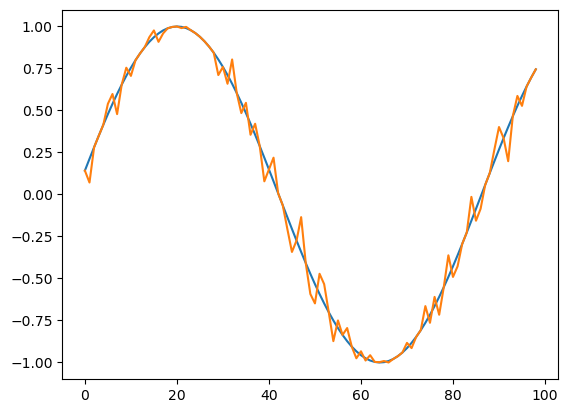

In [90]:
# some debugging


#sine_freq = 5
#s = sine(sine_freq, T, fs)
#plt.plot(s)


#rect_duty = .1
#rect_per = 10e-3
#r = rect(rect_duty, rect_per, T, fs)
#r_scale = normalize4wav(r)
#plt.plot(r)
#fname = ('../../wav/rect_duty' + str(rect_duty) + '_rect_per' + str(rect_per) + '.wav')
#write(fname, fs, np.int16(r_scale))


# sawtooth
#saw_per = 100e-3
#saw = sawtooth(saw_per, T, fs)
#saw_scale = normalize4wav(saw)
#plt.plot(saw)
#fname = ('../../wav/saw_per' + str(saw_per) + '.wav')
#write(fname, fs, np.int16(saw_scale))


# triangle
#tri_per = 1e-3
#tri = triangle(tri_per, T, fs)
#tri_scale = normalize4wav(tri)
#plt.plot(tri)
#fname = ('../../wav/tri_per' + str(tri_per) + '.wav')
#write(fname, fs, np.int16(tri_scale))


# noise
#n = noise(T, fs)
#n_scale = normalize4wav(n)
#plt.plot(n)
#fname = ('../../wav/n_dur' + str(T) + '.wav')
#write(fname, fs, np.int16(n_scale))


# sample_scramble
s = sine(500,3,44100)
scramble_width = 4
sp = copy.copy(s)
sample_scramble(sp, scramble_width)
sample_scramble_scale =  normalize4wav(sp)
plt.plot(s[1:100])
plt.plot(sp[1:100])
fname = ('../../wav/scrambled_' + str(scramble_width) + '.wav')
write(fname, fs, np.int16(sample_scramble_scale))



